In [1]:
#!pip install nsepy
#!pip install yfinance
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [2]:
from Descriptive import Descriptive

In [3]:
obj=Descriptive()

In [4]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS"
stk_data = yf.download(stock_symbol, start="2023-01-01", end="2023-07-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2023-01-02 to 2023-06-30
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   122 non-null    float64
 1   (High, RELIANCE.NS)    122 non-null    float64
 2   (Low, RELIANCE.NS)     122 non-null    float64
 3   (Open, RELIANCE.NS)    122 non-null    float64
 4   (Volume, RELIANCE.NS)  122 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.7 KB


In [6]:
stk_data

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-01-02,1180.586060,1182.006865,1167.890577,1168.715541,5316175
2023-01-03,1171.946655,1179.256896,1167.707271,1175.613232,7658932
2023-01-04,1154.301392,1173.780010,1152.216007,1171.923749,9264891
2023-01-05,1152.239014,1162.482516,1147.632911,1156.570169,13637099
2023-01-06,1162.711548,1167.776018,1154.186834,1158.013796,6349597
...,...,...,...,...,...
2023-06-23,1152.559814,1161.107441,1151.299395,1159.044969,6628570
2023-06-26,1143.760010,1152.857653,1140.620538,1149.007778,12641159


In [14]:
low=stk_data['Low']

In [15]:
dataset=stk_data

In [16]:
quan,qual=obj.segreQuanQual(dataset)

The Quantitative Data: [('Close', 'RELIANCE.NS'), ('High', 'RELIANCE.NS'), ('Low', 'RELIANCE.NS'), ('Open', 'RELIANCE.NS'), ('Volume', 'RELIANCE.NS')]
The Qualtitative Data []


In [17]:
des_data=obj.descriptive_Analysis(dataset,quan)
des_data

,"(Close, RELIANCE.NS)","(High, RELIANCE.NS)","(Low, RELIANCE.NS)","(Open, RELIANCE.NS)","(Volume, RELIANCE.NS)"
Null_count,0,0,0,0,0
NonNull_count,122,122,122,122,122
Total_Count,122,122,122,122,122
Mean,1105.908632,1114.913303,1097.677095,1107.865513,13045123.737705
Median,1113.797302,1120.992984,1105.226728,1113.682856,11680332.5
Mode,1008.876465,1017.469976,999.137156,1015.178381,5316175
Std,43.154167,41.991315,43.645692,42.549927,5569096.501439
Min,1008.876465,1017.469976,999.137156,1015.178381,5316175.0
Q1:25%,1073.413574,1081.714999,1064.224235,1076.610452,9243317.25
Q2:50%,1113.797302,1120.992984,1105.226728,1113.682856,11680332.5


In [19]:
des_data['Low', 'RELIANCE.NS']

Null_count                 0
NonNull_count            122
Total_Count              122
Mean             1097.677095
Median           1105.226728
Mode              999.137156
Std                43.645692
Min               999.137156
Q1:25%           1064.224235
Q2:50%           1105.226728
Q3:75%           1129.557777
Q4:100%           1173.39039
IQR                65.333542
1.5Rule            98.000314
Lesser            966.223922
Greater          1227.558091
Name: (Low, RELIANCE.NS), dtype: object

In [20]:
import numpy as np

In [21]:
np.percentile(dataset['Low', 'RELIANCE.NS'],99)

1167.8713257432016

In [22]:
def get_pdf_probability(dataset, startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    sample = dataset
    sample_mean = sample.mean()
    sample_std = sample.std()
    print("Mean=%.3f, Standard Deviation=%.3f" % (sample_mean, sample_std))
    dist = norm(sample_mean, sample_std)
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob = sum(probabilities)
    print("The area between range({},{}): {}".format(startrange, endrange, sum(probabilities)))
    return prob


Mean=1105.909, Standard Deviation=43.154
The area between range(1000,1100): [0.43413587]


array([0.43413587])

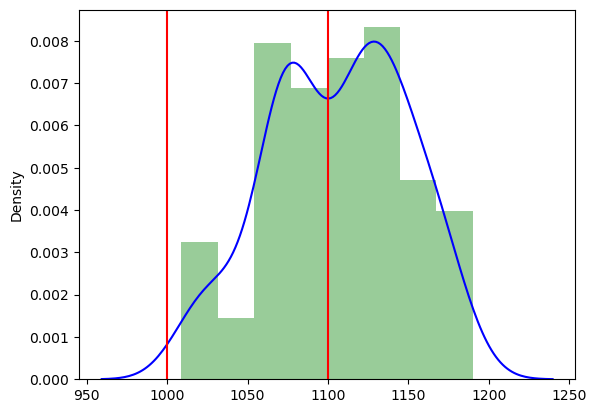

In [27]:
get_pdf_probability(dataset['Close'], 1000, 1100)

In [33]:
import seaborn as sns
def stdNDGraph(dataset):
    mean=dataset.mean()
    std=dataset.std()

    values=dataset.values

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


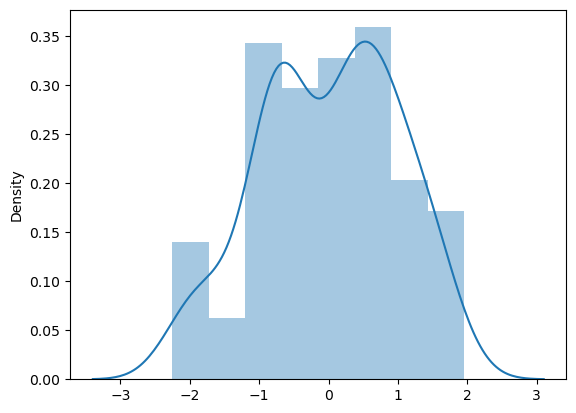

In [34]:
stdNDGraph(dataset['Close'])

In [37]:
def freqTable(columnName, dataset):
    import pandas as pd
    vc = dataset[columnName].value_counts()
    
    frq = pd.DataFrame({
        "Unique_Values": vc.index,
        "Frequency": vc.values,
        "Relative_Fre": (vc.values / len(dataset[columnName])) * 100
    })

    frq["Cumulative"] = frq["Relative_Fre"].cumsum()
    return frq


In [38]:

freqTable("Low", dataset)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,"(999.1371559991895,)",1,0.819672,0.819672
1,"(1129.7582854890468,)",1,0.819672,1.639344
2,"(1128.3834200937229,)",1,0.819672,2.459016
3,"(1127.9250304984787,)",1,0.819672,3.278689
4,"(1127.627175857481,)",1,0.819672,4.098361
...,...,...,...,...
117,"(1068.847705399231,)",1,0.819672,96.721311
118,"(1067.908135009568,)",1,0.819672,97.540984
119,"(1066.0518592606056,)",1,0.819672,98.360656
120,"(1065.158132665293,)",1,0.819672,99.180328


In [39]:

freqTable("High", dataset)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,"(1017.4699762133376,)",1,0.819672,0.819672
1,"(1145.7995369533242,)",1,0.819672,1.639344
2,"(1145.6160728282468,)",1,0.819672,2.459016
3,"(1141.7204304139966,)",1,0.819672,3.278689
4,"(1140.8496635852962,)",1,0.819672,4.098361
...,...,...,...,...
117,"(1087.088804600051,)",1,0.819672,96.721311
118,"(1086.6074765525984,)",1,0.819672,97.540984
119,"(1085.2095986717054,)",1,0.819672,98.360656
120,"(1084.8430233363044,)",1,0.819672,99.180328


In [40]:
fh=freqTable("High", dataset)

In [41]:
fh.sort_values(by='Frequency',ascending=False)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,"(1017.4699762133376,)",1,0.819672,0.819672
91,"(1081.1764701886825,)",1,0.819672,75.409836
89,"(1032.1133355509144,)",1,0.819672,73.770492
88,"(1033.0527910081307,)",1,0.819672,72.950820
87,"(1033.052792054034,)",1,0.819672,72.131148
...,...,...,...,...
36,"(1182.006865479474,)",1,0.819672,30.327869
35,"(1183.565154648271,)",1,0.819672,29.508197
34,"(1184.2984822350734,)",1,0.819672,28.688525
33,"(1192.5481603325027,)",1,0.819672,27.868852


In [44]:
frq = freqTable("Low", dataset) 
fhs = frq[frq["Frequency"] == 2]["Unique_Values"].sort_values(ascending=False)


In [45]:
fhs

Series([], Name: Unique_Values, dtype: object)